<a href="https://colab.research.google.com/github/cvt220106/python6_study/blob/main/tf01_keras_classification_model_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.8.2
sys.version_info(major=3, minor=7, micro=13, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.21.6
pandas 1.3.5
sklearn 1.0.2
tensorflow 2.8.2
keras.api._v2.keras 2.8.0


In [3]:
!nvidia-smi

Mon Jul 25 15:14:19 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)


In [6]:
a=np.arange(1,10).reshape(3,3)
print(a)
b=a.reshape(3,3,1)
b

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]],

       [[7],
        [8],
        [9]]])

In [7]:
x_train_scaled[1]

array([[[-8.10513616e-01],
        [-8.10513616e-01],
        [-8.10513616e-01],
        [-8.10513616e-01],
        [-8.10513616e-01],
        [-8.10513616e-01],
        [-8.10513616e-01],
        [-3.21568936e-01],
        [-1.99332744e-01],
        [ 2.56274849e-01],
        [ 1.42307472e+00],
        [-4.21580344e-01],
        [-8.10513616e-01],
        [-8.10513616e-01],
        [-8.10513616e-01],
        [-8.10513616e-01],
        [-8.10513616e-01],
        [-1.43770844e-01],
        [ 1.23416436e+00],
        [-2.21557513e-01],
        [-2.54894644e-01],
        [-6.21603191e-01],
        [-8.10513616e-01],
        [-8.10513616e-01],
        [-8.10513616e-01],
        [-8.10513616e-01],
        [-8.10513616e-01],
        [-8.10513616e-01]],

       [[-8.10513616e-01],
        [-8.10513616e-01],
        [-8.10513616e-01],
        [-8.10513616e-01],
        [-8.10513616e-01],
        [-8.10513616e-01],
        [ 2.00712934e-01],
        [ 3.45173866e-01],
        [ 1.11813895e-01],

In [8]:
model = keras.models.Sequential()
#添加卷积层，filters输出有多少通道，就是有多少卷积核，kernel_size卷积核的大小，
# padding是否加上padding，same代表输出和输入大小一样，1代表通道数目是1
model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
                              padding='same',
                              activation='relu',
                              input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
                              padding='same',
                              activation='relu'))
#添加池化层，pool_size是窗口大小，步长默认和窗口大小相等
model.add(keras.layers.MaxPool2D(pool_size=2))
#为了缓解损失，所以filters翻倍
model.add(keras.layers.Conv2D(filters=64, kernel_size=3,
                              padding='same',
                              activation='relu'))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3,
                              padding='same',
                              activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3,
                              padding='same',
                              activation='relu'))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3,
                              padding='same',
                              activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [10]:
model.variables

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 0.09875792, -0.02437842, -0.12118331,  0.06899382,
            0.02382854, -0.01648788, -0.09479242,  0.07019991,
           -0.04227395,  0.0479921 ,  0.0606757 , -0.1014586 ,
            0.0126023 , -0.11611061, -0.04375273, -0.0115584 ,
            0.08068563,  0.13703428,  0.07078958,  0.03897916,
           -0.06352833, -0.04487281,  0.04314093,  0.03999761,
            0.00516701, -0.00800405,  0.07235511, -0.11071954,
           -0.04411884,  0.07426743,  0.13792713, -0.10546263]],
 
         [[-0.13910799,  0.12872098, -0.00795889,  0.08813587,
           -0.13476942, -0.04507105,  0.07079697,  0.05852406,
            0.08686064,  0.00341551,  0.0258977 , -0.11227381,
           -0.11367801,  0.01577978,  0.03833957,  0.13276543,
            0.12813683,  0.00368328,  0.1334873 ,  0.00440034,
            0.13081352, -0.01763812, -0.10004767,  0.08440456,
           -0.1003941 ,  0.12265427, -0.

In [11]:
# model = keras.models.Sequential()
# #添加卷积层，filters输出有多少通道，就是有多少卷积核，kernel_size卷积核的大小，
# # padding是否加上padding，same代表输出和输入大小一样，1代表通道数目是1
# model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
#                               padding='valid',
#                               activation='relu',
#                               input_shape=(28, 28, 1)))
# model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
#                               padding='valid',
#                               activation='relu',strides=3))
# #添加池化层，pool_size是窗口大小，步长默认和窗口大小相等
# model.add(keras.layers.MaxPool2D(pool_size=2))
# #为了缓解损失，所以filters翻倍
# # model.add(keras.layers.Conv2D(filters=64, kernel_size=3,
# #                               padding='valid',
# #                               activation='relu'))
# # model.add(keras.layers.Conv2D(filters=64, kernel_size=3,
# #                               padding='valid',
# #                               activation='relu'))
# # model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
# # model.add(keras.layers.Conv2D(filters=128, kernel_size=3,
# #                               padding='valid',
# #                               activation='relu'))
# # model.add(keras.layers.Conv2D(filters=128, kernel_size=3,
# #                               padding='valid',
# #                               activation='relu'))
# # model.add(keras.layers.MaxPool2D(pool_size=2))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(128, activation='relu'))
# model.add(keras.layers.Dense(10, activation="softmax"))

# model.compile(loss="sparse_categorical_crossentropy",
#               optimizer = "sgd",
#               metrics = ["accuracy"])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [13]:
32*32*9+32

9248

In [14]:
!ls

sample_data


In [15]:
!rm -rf cnn-relu-callbacks

In [23]:
logdir = './cnn-relu-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
history = model.fit(x_train_scaled, y_train, epochs=100,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = callbacks)

Epoch 1/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2020 - accuracy: 0.9250 - val_loss: 0.2390 - val_accuracy: 0.9102
Epoch 2/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1909 - accuracy: 0.9283 - val_loss: 0.2368 - val_accuracy: 0.9136
Epoch 3/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1790 - accuracy: 0.9342 - val_loss: 0.2348 - val_accuracy: 0.9148
Epoch 4/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1694 - accuracy: 0.9374 - val_loss: 0.2374 - val_accuracy: 0.9146
Epoch 5/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1597 - accuracy: 0.9399 - val_loss: 0.2372 - val_accuracy: 0.9160
Epoch 6/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1502 - accuracy: 0.9438 - val_loss: 0.2532 - val_accuracy: 0.9116
Epoch 7/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1422 - accuracy: 0.9469 - val_loss: 0.2265 - val_ac

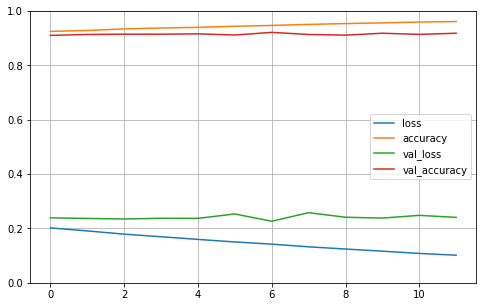

In [30]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [25]:
model.evaluate(x_test_scaled, y_test, verbose = 0)

[0.2697245478630066, 0.9118000268936157]

In [26]:
#通过下面方法来确定某一层输出尺寸
x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.],
                 [7., 8., 9.]])
x = tf.reshape(x, [1, 3, 3, 1])
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
   strides=(1, 1), padding='valid')

In [27]:
x

<tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[1.],
         [2.],
         [3.]],

        [[4.],
         [5.],
         [6.]],

        [[7.],
         [8.],
         [9.]]]], dtype=float32)>

In [28]:
max_pool_2d(x)

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[5.],
         [6.]],

        [[8.],
         [9.]]]], dtype=float32)>

In [29]:
gmp = tf.keras.layers.GlobalMaxPooling2D()
gmp(x)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[9.]], dtype=float32)>